In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import subprocess as sp

def run_cmd(nproc, mode, initial_size, end_size, factor, iterations):
    cmd = ['wsl', 'mpirun', '-np', str(nproc), './main',
           str(mode),
           str(initial_size),
           str(end_size),
           str(factor),
           str(iterations)
           ]
    output = sp.check_output(cmd, shell=True).decode('cp866')
    output = [a.split('\t') for a in output.split('\n')]
    output = np.array(output[:-1], dtype=np.float32)
    return np.split(output, 2, 1)[0], np.split(output, 2, 1)[1]

def plot_time_size(title, mode, initial_size, end_size, factor, iterations):
    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='array size, n', ylabel='time, s', title=title)

    x, ys = run_cmd(1, mode, initial_size, end_size, factor, iterations)
    ax.plot(x, ys, label='merge sort')
    ax.legend()

    x, yp = run_cmd(6, mode + 3, initial_size, end_size, factor, iterations)
    ax.plot(x, yp, label='merge sort parallel (6)')
    ax.legend()

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='array size, n', ylabel='time, s / (n * log(n))')

    ys = ys / np.array([n * m.log2(n) for n in x])
    ax.plot(x, ys, label='merge sort')
    ax.legend()

    yp = yp / np.array([n * m.log2(n) for n in x])
    ax.plot(x, yp, label='merge sort parallel (6)')
    ax.legend()

def plot_time_proc(array_size, nproc_max, iterations):
    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='time, s', title='Execution time,  array size ' + str(array_size))

    x = range(1, nproc_max + 1)
    y = np.array([])
    for nproc in x:
        xx, time_s = run_cmd(nproc, 3, array_size, array_size + 1, 2.0, iterations)
        y = np.append(y, time_s[0])

    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='acceleration', title='Acceleration,  array size ' + str(array_size))
    y = y[0] / y
    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='efficiency', title='Efficiency,  array size ' + str(array_size))
    y = y / x
    ax.plot(x, y)

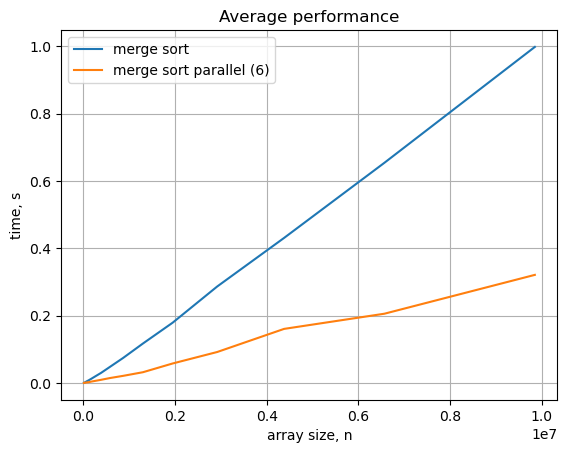

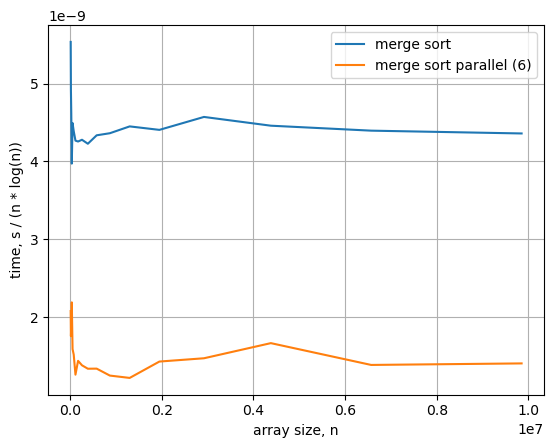

In [3]:
plot_time_size('Average performance', 0, 10000, 10000000, 1.5, 1)

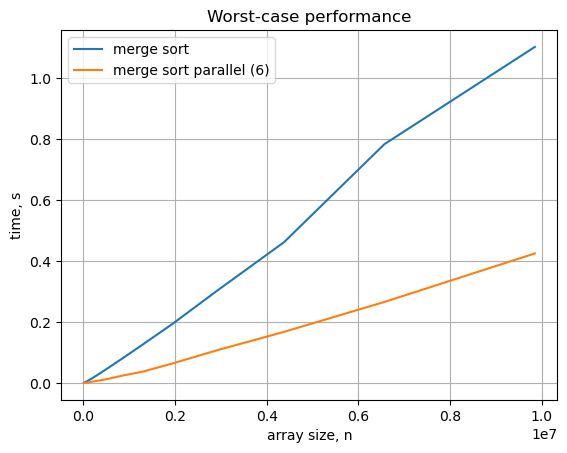

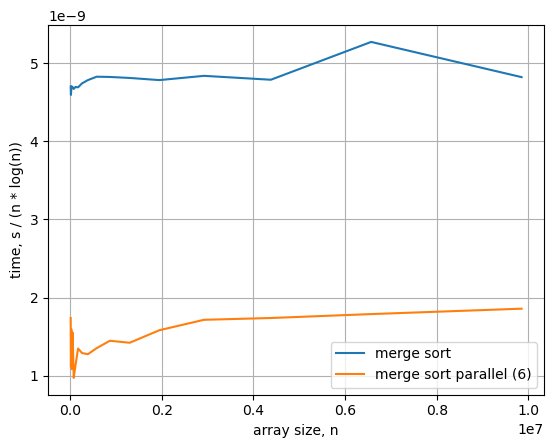

In [4]:
plot_time_size('Worst-case performance', 1, 10000, 10000000, 1.5, 1)

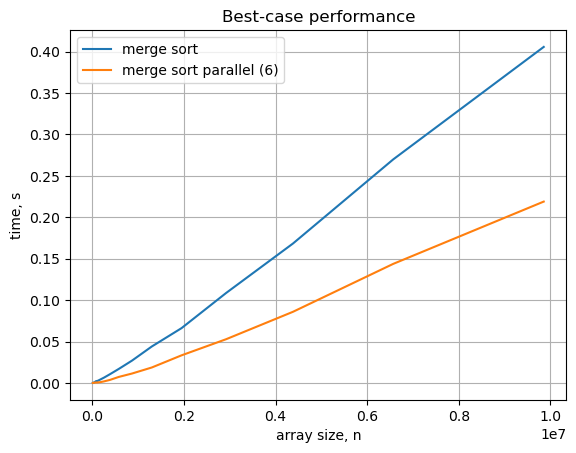

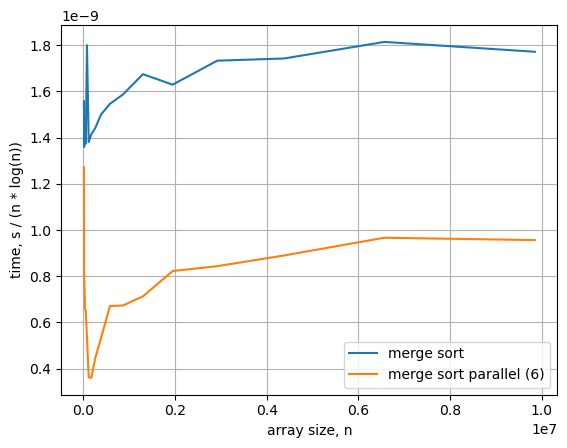

In [5]:
plot_time_size('Best-case performance', 2, 10000, 10000000, 1.5, 1)

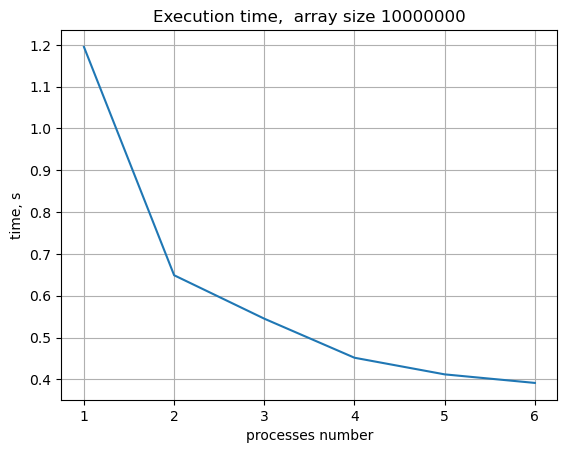

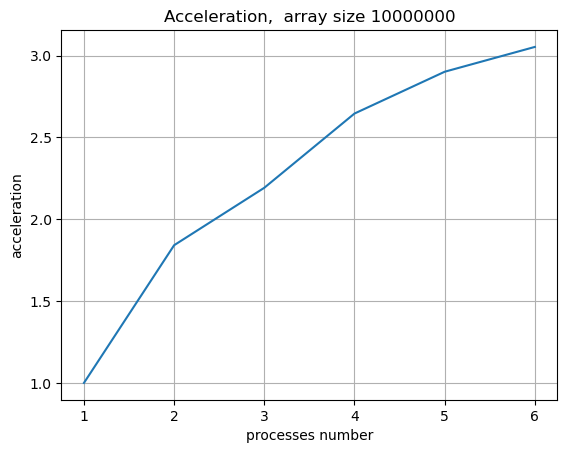

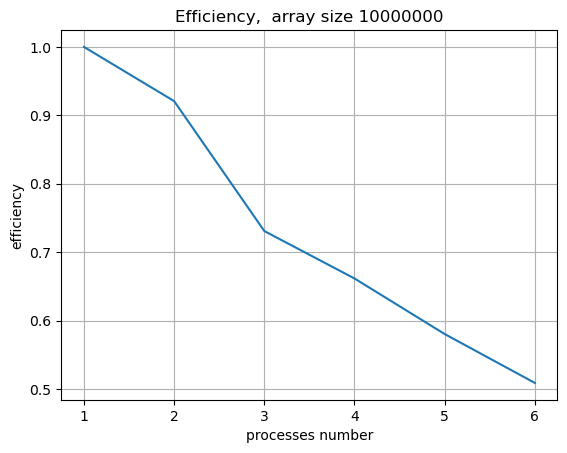

In [6]:
plot_time_proc(10000000, 6, 10)

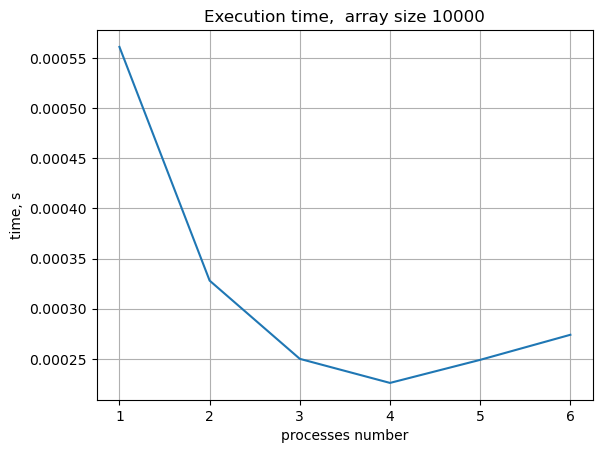

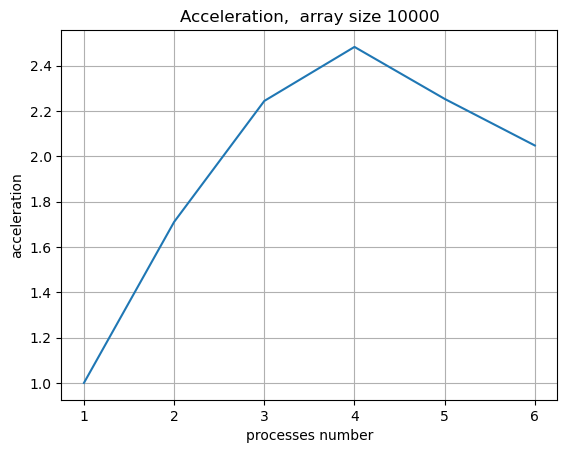

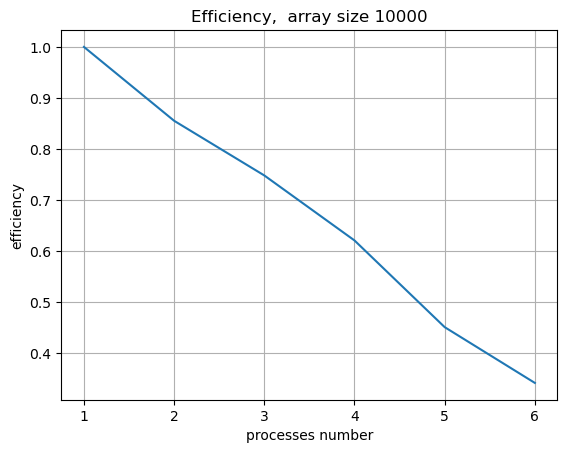

In [10]:
plot_time_proc(10000, 6, 4000)